### 📊 Telco Customer Churn Dataset

### Column Explanation

### 🔑 Customer Info
- **`customerID`** → Unique identifier for each customer (not useful for prediction).
- **`gender`** → Customer’s gender (`Male`, `Female`).
- **`SeniorCitizen`** → `0 = No`, `1 = Yes` (whether the customer is a senior citizen).
- **`Partner`** → Customer has a partner (`Yes`/`No`).
- **`Dependents`** → Customer has dependents (`Yes`/`No`).

---

### ⏳ Tenure & Account Details
- **`tenure`** → Number of months the customer has stayed with the company.
- **`Contract`** → Contract type (`Month-to-month`, `One year`, `Two year`).
- **`PaperlessBilling`** → Uses paperless billing (`Yes`/`No`).
- **`PaymentMethod`** → How the customer pays (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`).

---

### 📡 Services Signed Up
- **`PhoneService`** → Customer has phone service (`Yes`/`No`).
- **`MultipleLines`** → Multiple phone lines (`Yes`, `No`, `No phone service`).
- **`InternetService`** → Internet service type (`DSL`, `Fiber optic`, `No`).
- **`OnlineSecurity`** → Has online security add-on (`Yes`, `No`, `No internet service`).
- **`OnlineBackup`** → Has online backup service (`Yes`, `No`, `No internet service`).
- **`DeviceProtection`** → Has device protection plan (`Yes`, `No`, `No internet service`).
- **`TechSupport`** → Has technical support (`Yes`, `No`, `No internet service`).
- **`StreamingTV`** → Has TV streaming (`Yes`, `No`, `No internet service`).
- **`StreamingMovies`** → Has movie streaming (`Yes`, `No`, `No internet service`).

---

### 💰 Financial Info
- **`MonthlyCharges`** → Amount charged per month.
- **`TotalCharges`** → Total amount charged (roughly tenure × monthly charges).

---

### 🎯 Target Variable
- **`Churn`** → Did the customer leave the company in the last month? (`Yes`/`No`).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import math

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score

### EDA

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation 

In [9]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [11]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- It can also be noted that the **`tenure`** column contains `0` for some entries even though the 
  **`MonthlyCharges`** column is not empty.  
- This indicates that these customers have just joined and were billed immediately.  
- Let's check if there are any other `0` values in the **`tenure`** column.

In [12]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There are no additional missing values in the Tenure column.
- Let's replace the missing columns with 0.0 as the total charges will be 0 because the customer has joined recently(tenure = 0 | tenure x monthly = 0).

In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(0.0)

In [14]:
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [15]:
df.shape

(7043, 20)

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking The Class Distribution of The Target Column

In [17]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1 : 'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Visualisation

In [19]:
numerical_col = ['MonthlyCharges', 'TotalCharges', 'tenure']
df[numerical_col].describe()

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,32.371149
std,30.090047,2266.794470,24.559481
min,18.250000,0.000000,0.000000
25%,35.500000,398.550000,9.000000
50%,70.350000,1394.550000,29.000000
75%,89.850000,3786.600000,55.000000
max,118.750000,8684.800000,72.000000


#### Univariate

##### HistoGram

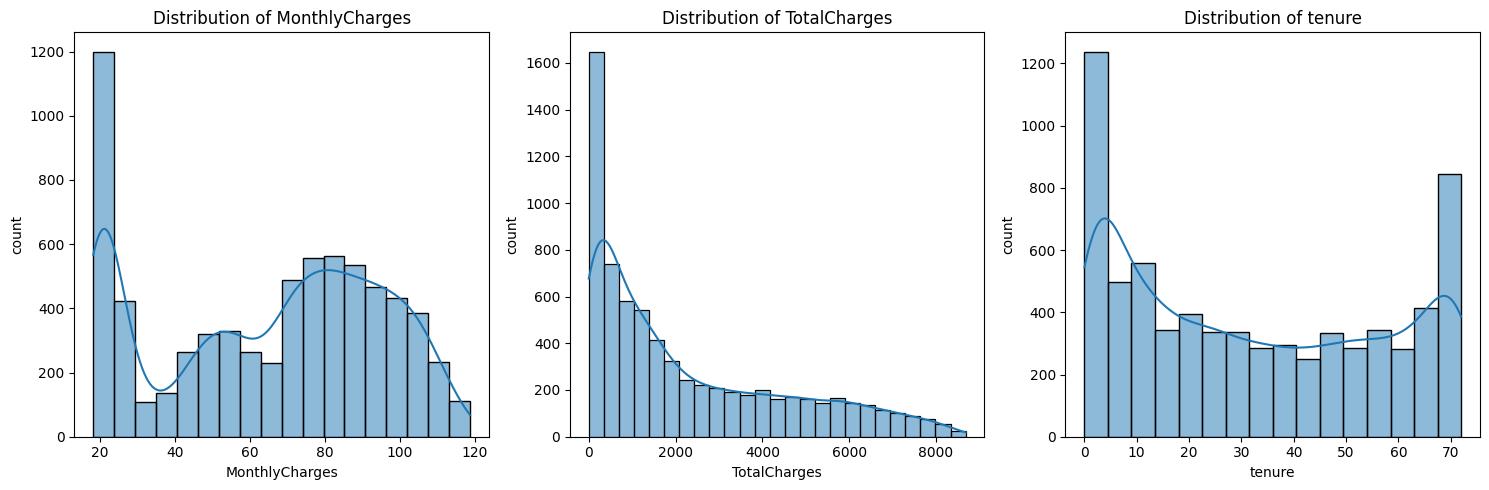

In [20]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(rows, cols, i)         
    sns.histplot(df[col], kde=True) 
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

##### BoxPlot

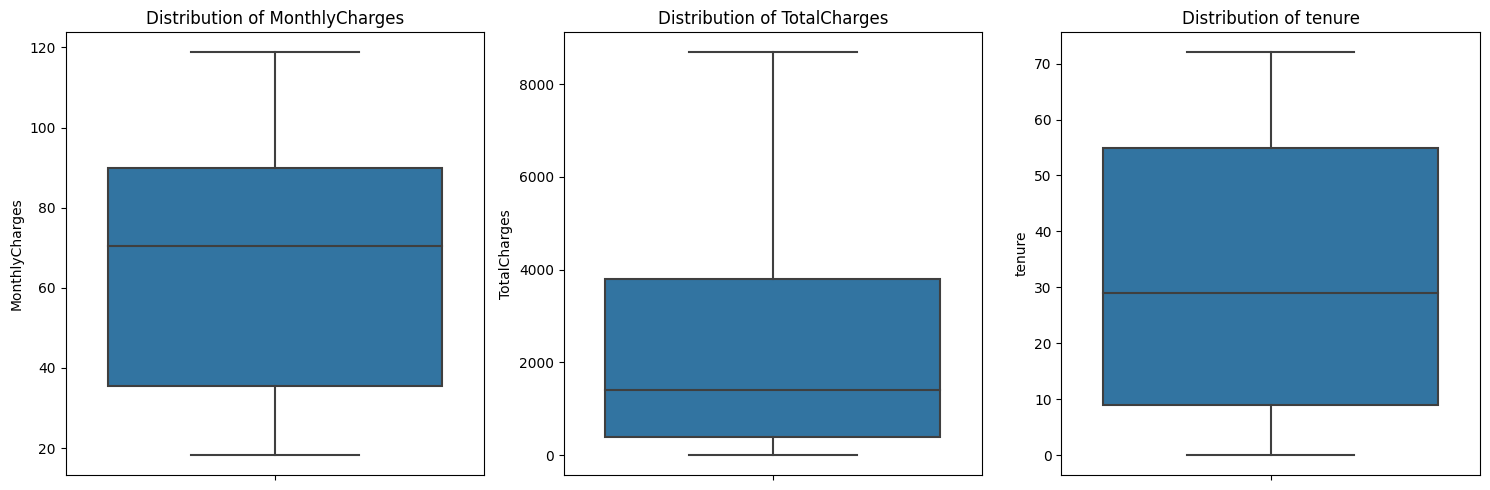

In [21]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Bivariate

In [23]:
categorical_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

##### CountPlot

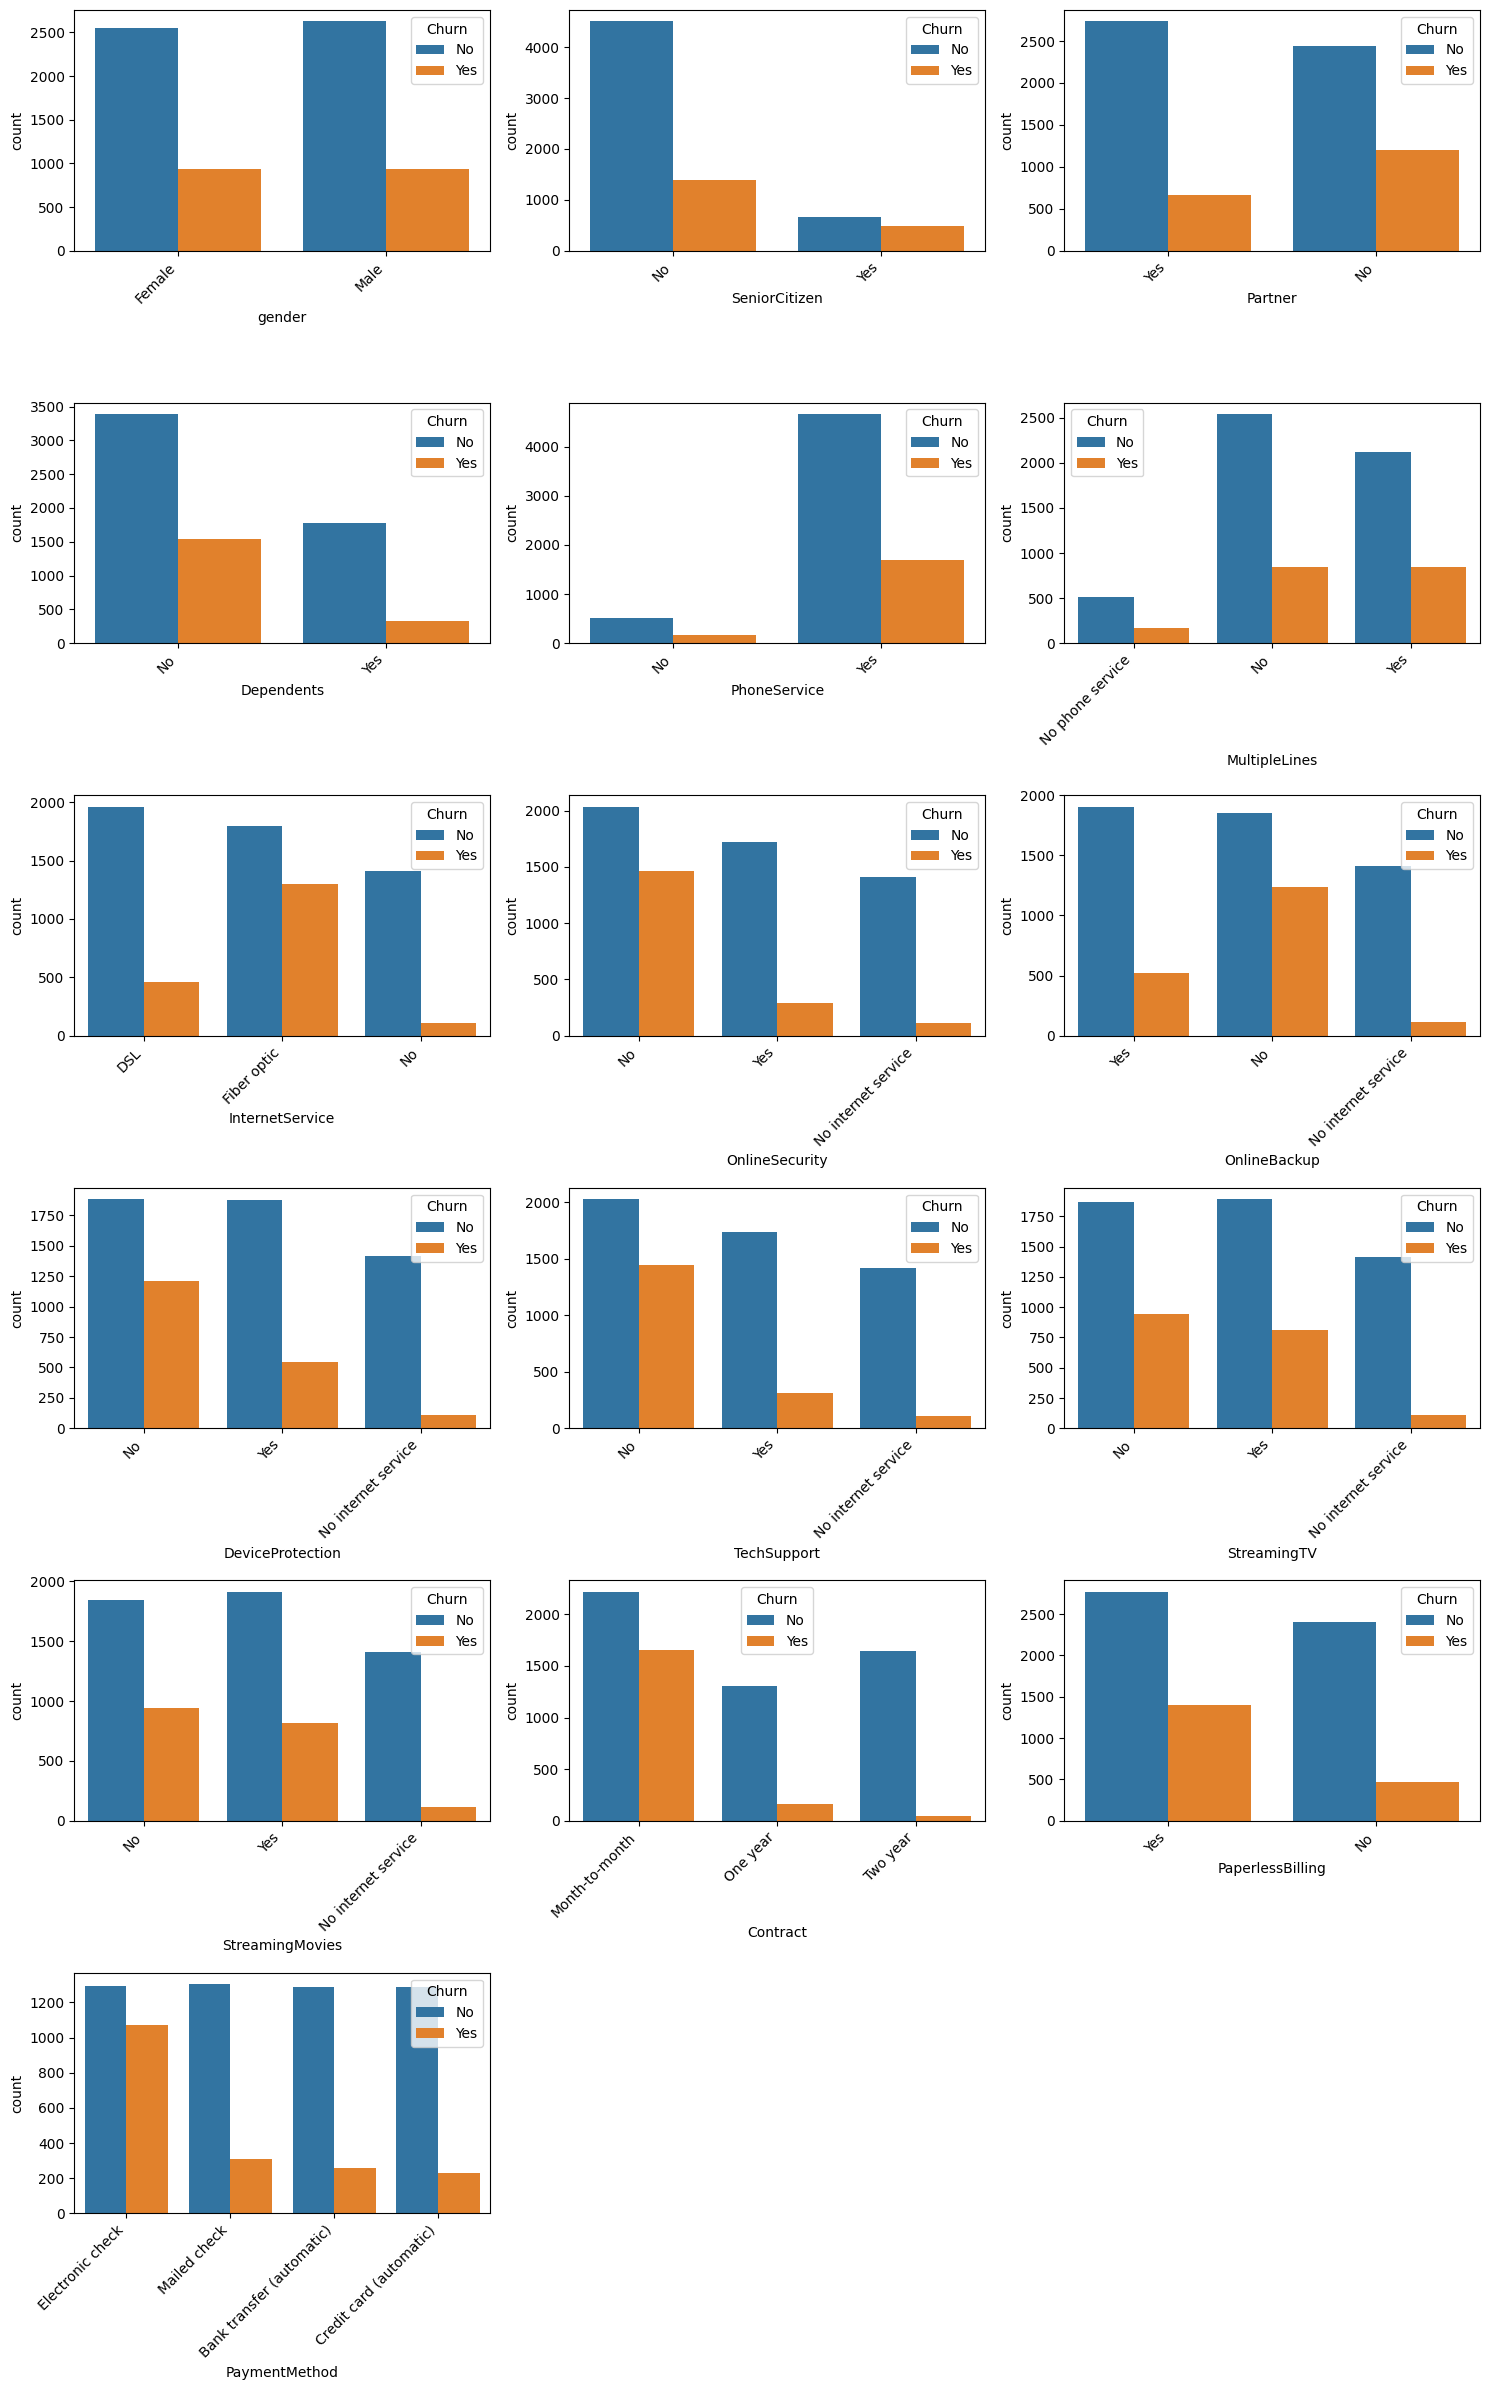

In [24]:
n = len(categorical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(categorical_col, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Churn')
    # plt.title(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### BoxPlot

In [25]:
from scipy import stats

churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

for col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
    t_stat, p_val = stats.ttest_ind(churn_yes[col], churn_no[col], equal_var=False)
    print(f"{col}: t={t_stat:.2f}, p={p_val:.5f}")

MonthlyCharges: t=18.41, p=0.00000
TotalCharges: t=-18.71, p=0.00000
tenure: t=-34.82, p=0.00000


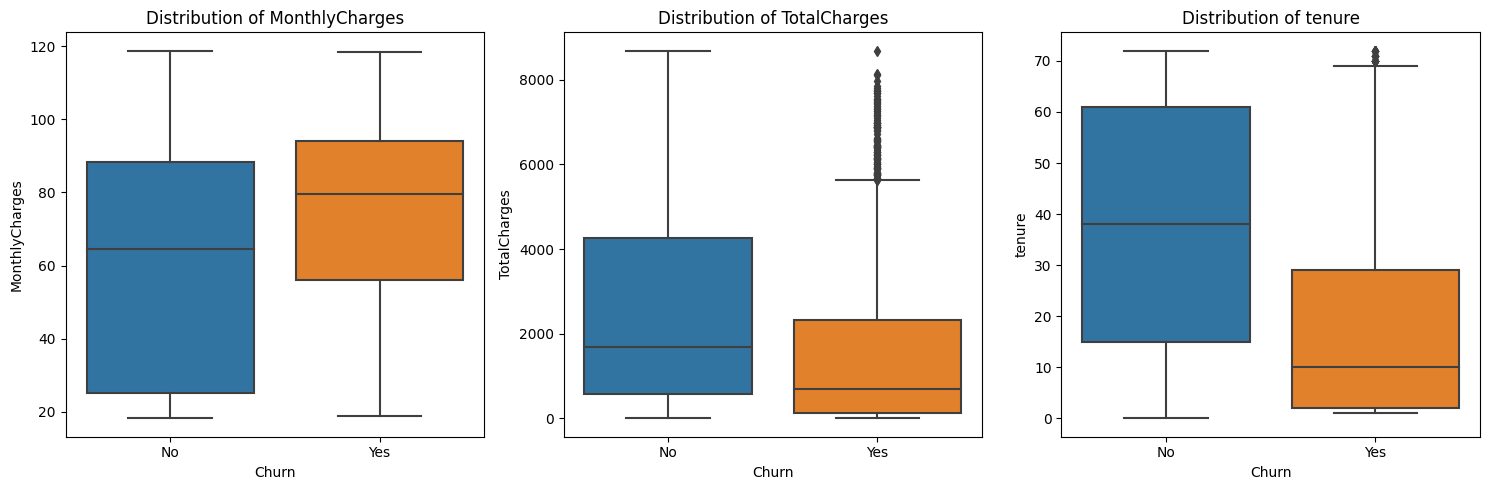

In [26]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], x = df['Churn'])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### ViolinPlot

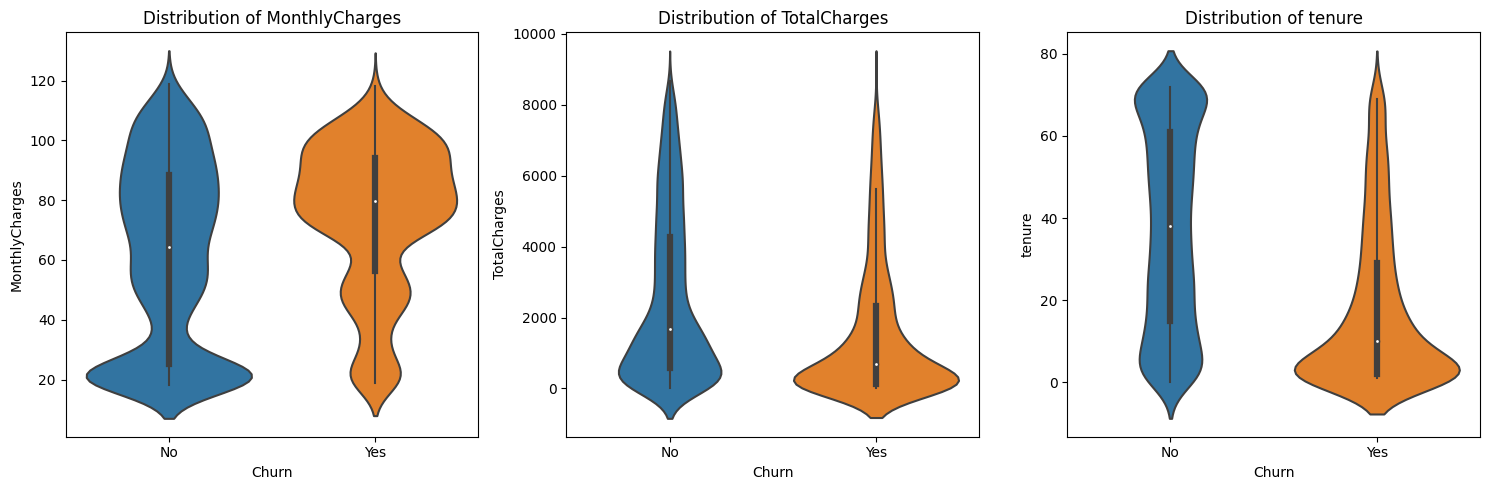

In [27]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(rows, cols, i)
    sns.violinplot(y=df[col], x = df['Churn'])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Correlation

In [28]:
df[numerical_col].corr()

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651174,0.247900
TotalCharges,0.651174,1.000000,0.826178
tenure,0.247900,0.826178,1.000000


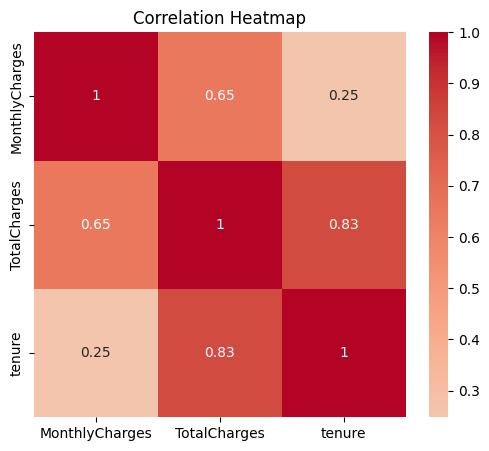

In [29]:
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

##### Correlation wrt Churn

In [30]:
df_copy = df.copy()

In [31]:
df_copy['Churn'] = df_copy['Churn'].astype(str).str.strip().str.capitalize().map({'Yes':1, 'No':0})

for col in ['TotalCharges','MonthlyCharges','tenure']:
    if col in df_copy.columns:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

numeric_df = df_copy.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

print("Numeric columns used for correlation:\n", numeric_df.columns.tolist())

corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)

Numeric columns used for correlation:
 ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [32]:
print("\nCorrelation with Churn:\n", corr_with_churn)


Correlation with Churn:
 Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn, dtype: float64


### Data Preprocessing & Model Evaluation

#### Preprocessing

Splitting The Data into Train & Test Sets

In [33]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

Encoding the Target Variable

In [34]:
le = LabelEncoder()

y = le.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Checking Categorical Columns

In [36]:
for col in categorical_col:
    print(f'{col}:\n{df[col].unique()}')
    print('-'*50)

gender:
['Female' 'Male']
--------------------------------------------------
SeniorCitizen:
['No' 'Yes']
--------------------------------------------------
Partner:
['Yes' 'No']
--------------------------------------------------
Dependents:
['No' 'Yes']
--------------------------------------------------
PhoneService:
['No' 'Yes']
--------------------------------------------------
MultipleLines:
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService:
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity:
['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup:
['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection:
['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport:
['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV:
['No' 

In [37]:
BINARY_COLS = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen'
]

OHE_COLS = [
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]

NUMERIC_COLS = ['tenure', 'MonthlyCharges', 'TotalCharges']

Encoding & Transforming Columns

* The encoding and transformation are done after splitting the dataset, ensuring there’s no data leakage.

In [38]:
ct = ColumnTransformer(
    transformers=[
        ("le", OrdinalEncoder(), BINARY_COLS), 
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False), OHE_COLS),
        ("scale", StandardScaler(), NUMERIC_COLS),   
    ],
    remainder="passthrough"  
)

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed  = ct.transform(X_test)

raw_names = ct.get_feature_names_out()

clean_names = [name.split('__', 1)[1] if '__' in name else name for name in raw_names]
X_train_transformed = pd.DataFrame(X_train_transformed, columns=clean_names, index=X_train.index)
X_test_transformed  = pd.DataFrame(X_test_transformed,  columns=clean_names, index=X_test.index)

##### Handling Class Imbalance in the Training Set Using SMOT

In [39]:
print(pd.Series(y_train).value_counts())

0    4138
1    1496
Name: count, dtype: int64


In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

In [41]:
from collections import defaultdict

cat_dummy_cols = [col for col in X_train_smote.columns if col not in NUMERIC_COLS]

groups = defaultdict(list)
for col in cat_dummy_cols:
    prefix = col.split('_')[0]
    groups[prefix].append(col)

for prefix, cols in groups.items():
    if len(cols) > 2:
        def one_hot_argmax(row):
            out = pd.Series(0, index=row.index)
            out[row.idxmax()] = 1
            return out
        X_train_smote[cols] = X_train_smote[cols].apply(one_hot_argmax, axis=1)
    else: 
        X_train_smote[cols] = X_train_smote[cols].round().astype(int)

# Final overwrite
X_train_transformed = X_train_smote.copy()
y_train = y_train_smote.copy()

#### Model Evaluations and Prediction


---- LogisticRegression ----
LogisticRegression CV Acc: 0.77
Accuracy: 0.7558552164655784
ROC-AUC: 0.8615848230459492
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



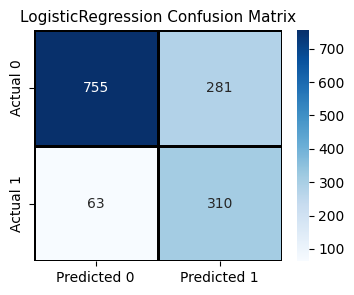


---- KNeighborsClassifier ----
KNeighborsClassifier CV Acc: 0.77
Accuracy: 0.723207948899929
ROC-AUC: 0.8259520531638493
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1036
           1       0.49      0.82      0.61       373

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409



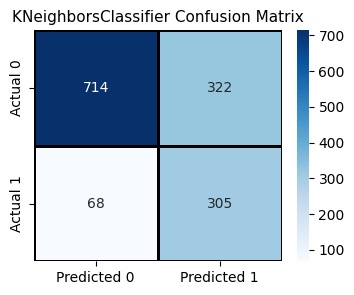


---- SVC ----
SVC CV Acc: 0.78
Accuracy: 0.7544357700496807
ROC-AUC: 0.8456439491962282
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.52      0.79      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



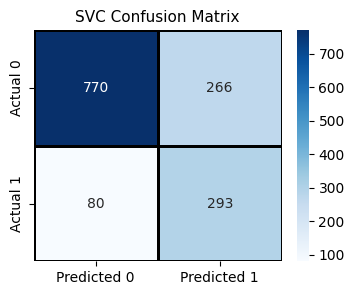


---- DecisionTreeClassifier ----
DecisionTreeClassifier CV Acc: 0.77
Accuracy: 0.7083037615330021
ROC-AUC: 0.6596675189168486
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1036
           1       0.46      0.56      0.50       373

    accuracy                           0.71      1409
   macro avg       0.64      0.66      0.65      1409
weighted avg       0.73      0.71      0.72      1409



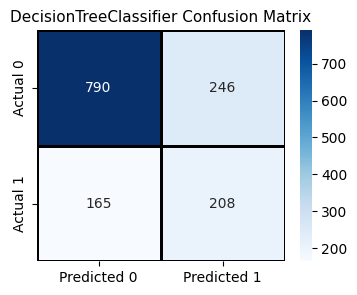


---- RandomForestClassifier ----
RandomForestClassifier CV Acc: 0.78
Accuracy: 0.765791341376863
ROC-AUC: 0.8617789083606778
              precision    recall  f1-score   support

           0       0.91      0.75      0.83      1036
           1       0.54      0.80      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409



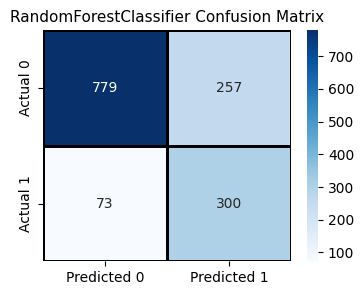


---- AdaBoostClassifier ----
AdaBoostClassifier CV Acc: 0.77
Accuracy: 0.7459190915542938
ROC-AUC: 0.8582789031850693
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.51      0.83      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



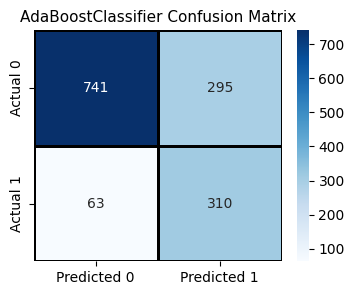


---- GradientBoostingClassifier ----
GradientBoostingClassifier CV Acc: 0.79
Accuracy: 0.7693399574166075
ROC-AUC: 0.858438053143147
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1036
           1       0.54      0.81      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



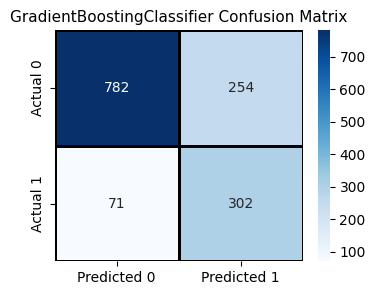


---- XGBClassifier ----
XGBClassifier CV Acc: 0.81
Accuracy: 0.7650816181689141
ROC-AUC: 0.8429306364963202
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.54      0.73      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.77      1409



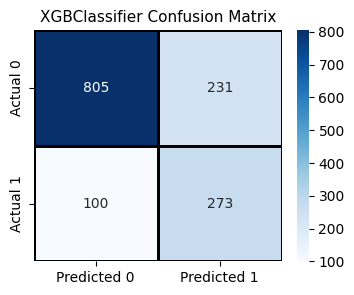

In [42]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=11),
    "SVC": SVC(probability=True, random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(
        n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30
    ),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", random_state=42),
    "GradientBoost": GradientBoostingClassifier(random_state=42),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators = 200, max_depth = 5, learning_rate = 0.1)
}

def evaluate_model(m, Xtr, ytr, Xte, yte,
                        cv_folds=3, scoring='accuracy', n_jobs=-1,
                        random_state=42, verbose=True):
    m.fit(Xtr, ytr)

    ypred = m.predict(Xte)
    yprob = m.predict_proba(Xte)[:,1] if hasattr(m, 'predict_proba') else None

    print('\n----', m.__class__.__name__, '----')

    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
    score = cross_val_score(m, Xtr, ytr, cv = cv, scoring = 'accuracy', n_jobs = n_jobs)

    print(f'{m.__class__.__name__} CV Acc: {np.mean(score):.2f}')
    print('Accuracy:', accuracy_score(yte, ypred))

    if yprob is not None:
        print('ROC-AUC:', roc_auc_score(yte, yprob))
    print(classification_report(yte, ypred))

    cm = confusion_matrix(yte, ypred)
    plt.figure(figsize = (4,3))
    sns.heatmap(cm, annot = True,  fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)
    plt.title(m.__class__.__name__ + ' Confusion Matrix', fontsize = 11)
    plt.show()

for name, mod in models.items():
    evaluate_model(mod, X_train_transformed, y_train, X_test_transformed, y_test)

---- Voting Classifier ----
Voting Classifier CV Acc: 0.79
Accuracy: 0.7572746628814763
ROC-AUC: 0.8637145858995725
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



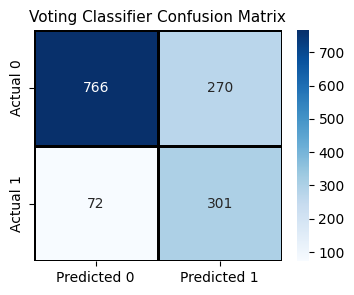

In [43]:
##### Voting Classifier
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier(algorithm="SAMME", random_state=42)

model_Voting = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
model_Voting.fit(X_train_transformed, y_train)
y_predVC = model_Voting.predict(X_test_transformed)

print(f'---- Voting Classifier ----')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model_Voting, X_train_transformed, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f'Voting Classifier CV Acc: {np.mean(score):.2f}')

print(f'Accuracy: {accuracy_score(y_test, y_predVC)}')

yprob = model_Voting.predict_proba(X_test_transformed)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, yprob))

print(f'Classification Report: {classification_report(y_test, y_predVC)}')

cm_VC = confusion_matrix(y_test, y_predVC)

plt.figure(figsize = (4,3))
sns.heatmap(cm_VC, annot = True,  fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)

plt.title('Voting Classifier Confusion Matrix', fontsize = 11)
plt.show()

### Among all the models, XGBoost delivered the best performance, so we’ll use it going forward to make predictions

### Thank you!